In [1]:
print("Hai there .. completed using Colab")

Hai there .. completed using Colab


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Initial Loading

In [4]:
dataset_path = "./Numerical_Done_DF.csv"

In [5]:
df = pd.read_csv(dataset_path)

In [6]:
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital-gain-log,has-capital-gain,has-capital-loss,capital-loss-log,hours-per-week-scaled
0,25,Private,7,Single,Blue-Collar,Own-child,Black,Male,40,North America,<=50K,0.000000,0,0,0.0,-0.043235
1,38,Private,9,Married,Agriculture,Spouse,White,Male,50,North America,<=50K,0.000000,0,0,0.0,0.803284
2,28,Local-gov,12,Married,Service,Spouse,White,Male,40,North America,>50K,0.000000,0,0,0.0,-0.043235
3,44,Private,10,Married,Blue-Collar,Spouse,Black,Male,40,North America,>50K,8.947546,1,0,0.0,-0.043235
4,18,Others,10,Single,Unknown,Own-child,White,Female,30,North America,<=50K,0.000000,0,0,0.0,-0.889753


### Encoding

#### Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()

In [9]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
categorical_cols.remove('income')
print(f"Columns to encode: {categorical_cols}")

Columns to encode: ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [10]:
# Label Encoding each of the categorical columns.
for col in categorical_cols:
  df[col] = encoder.fit_transform(df[col])

In [11]:
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital-gain-log,has-capital-gain,has-capital-loss,capital-loss-log,hours-per-week-scaled
0,25,3,7,2,1,2,2,1,40,6,<=50K,0.000000,0,0,0.0,-0.043235
1,38,3,9,0,0,3,4,1,50,6,<=50K,0.000000,0,0,0.0,0.803284
2,28,1,12,0,3,3,4,1,40,6,>50K,0.000000,0,0,0.0,-0.043235
3,44,3,10,0,1,3,2,1,40,6,>50K,8.947546,1,0,0.0,-0.043235
4,18,2,10,2,4,2,4,0,30,6,<=50K,0.000000,0,0,0.0,-0.889753


#### Numerical Scaling

**Info**:  First splitting the data, then applying scaling to it.


##### Splitting into: `I/O` & `Train-Test`

In [12]:
x = df.drop(columns=['income'])
y = df['income']

In [13]:
x.shape, y.shape

((48438, 15), (48438,))

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Train-Test split => then applying scaling.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

##### MinMax-Scaler

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
x_test_scaled

array([[0.18965517, 0.5       , 0.6       , ..., 0.        , 0.        ,
        0.42857143],
       [0.51724138, 0.5       , 0.66666667, ..., 0.        , 0.        ,
        0.42857143],
       [0.10344828, 0.5       , 0.53333333, ..., 0.        , 0.        ,
        0.42857143],
       ...,
       [0.31034483, 0.5       , 0.53333333, ..., 0.        , 0.        ,
        0.42857143],
       [0.06896552, 0.5       , 0.6       , ..., 0.        , 0.        ,
        0.35714286],
       [0.4137931 , 0.5       , 0.33333333, ..., 0.        , 0.        ,
        0.42857143]])

### Applying ML Algos

##### KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
# knn.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
predict = knn.predict(x_test_scaled)

In [23]:
predict

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, predict)

0.8339182493806772

In [26]:
knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(x_train_scaled, y_train)
predict2 = knn2.predict(x_test_scaled)

In [27]:
accuracy_score(y_test, predict2)

0.8378406275805119

##### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logi_reg = LogisticRegression()
logi_reg.fit(x_train_scaled, y_train)
logi_predict = logi_reg.predict(x_test_scaled)

In [30]:
accuracy_score( y_test, logi_predict)

0.8414533443435177

##### Neural Network => MLPClassifier

In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
mlp_clf_1 = MLPClassifier(
    solver='lbfgs',
    hidden_layer_sizes=(7, 4),
    random_state=3,
    max_iter=2000
)
mlp_clf_1.fit(x_train_scaled, y_train)
# => 0.8487819983484723

MLPClassifier(hidden_layer_sizes=(7, 4), max_iter=2000, random_state=3,
              solver='lbfgs')

In [33]:
# With (7, 4)
mlp_clf_predict_1 = mlp_clf_1.predict(x_test_scaled)
accuracy_score( y_test, mlp_clf_predict_1)

0.8487819983484723

In [34]:
# Alternative Next-best
mlp_clf2 = MLPClassifier(
    solver='lbfgs',
    hidden_layer_sizes=(5, 2),
    random_state=3,
    max_iter=2500
)
mlp_clf2.fit(x_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=2500, random_state=3,
              solver='lbfgs')

In [35]:
# => lbfgs w/ 2500.
mlp_clf_predict2 = mlp_clf2.predict(x_test_scaled)
accuracy_score( y_test, mlp_clf_predict2)

0.8478530140379852

##### Gradient-Boosting-Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
grbst_clf = GradientBoostingClassifier()
grbst_clf.fit(x_train, y_train)
grbst_predict = grbst_clf.predict(x_test)

In [52]:
accuracy_score(y_test, grbst_predict)

0.8607555739058629

##### Combined Models

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [80]:
models = {
    "knn": KNeighborsClassifier(),
    "logistic-regression": LogisticRegression(),
    "mlp-classifier": MLPClassifier(random_state=3),
    "svm": SVC(probability=True),
    "random-forest": RandomForestClassifier(),
    "gradient-boosting": GradientBoostingClassifier(),
    "naive-bayes": GaussianNB()
}
results = {}

In [82]:
for name, model in models.items():
  pipe = Pipeline([
      ('scaler', StandardScaler()),
      ('model', model)
  ])

  results[name] = {}

  pipe.fit(x_train, y_train)
  y_pred = pipe.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
  results[name]['accuracy'] = accuracy

  try:
    probas = pipe.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, probas[:, 1])
    results[name]['roc_auc'] = roc_auc
  except:
    results[name]['roc_auc'] = None

  print(f"{name} Accuracy: {accuracy:.4f}")
  print(f"{name} ROC AUC Score: {roc_auc:.4f}")
  report = classification_report(y_test, y_pred, output_dict=True)
  results[name]['classification_report'] = report
  print(classification_report(y_test, y_pred))

knn Accuracy: 0.8254
knn ROC AUC Score: 0.8549
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      7323
        >50K       0.66      0.60      0.63      2365

    accuracy                           0.83      9688
   macro avg       0.77      0.75      0.76      9688
weighted avg       0.82      0.83      0.82      9688

logistic-regression Accuracy: 0.8442
logistic-regression ROC AUC Score: 0.8941
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      7323
        >50K       0.74      0.56      0.64      2365

    accuracy                           0.84      9688
   macro avg       0.80      0.75      0.77      9688
weighted avg       0.84      0.84      0.84      9688

mlp-classifier Accuracy: 0.8518
mlp-classifier ROC AUC Score: 0.9039
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7323
        >50K       0.74      0.61      0.6

##### Plotting!

In [86]:
ml_models_used = list(results.keys())
accuracies = [results[model]['accuracy'] for model in ml_models_used]
roc_aucs = [results[model]['roc_auc'] for model in ml_models_used]

In [92]:
metrics_table = pd.DataFrame({
    'ML Model': ml_models_used,
    'Accuracy': accuracies,
    'ROC AUC': roc_aucs
})

In [93]:
metrics_table

,ML Model,Accuracy,ROC AUC
0,knn,0.825351,0.854894
1,logistic-regression,0.844240,0.894094
2,mlp-classifier,0.851775,0.903921
3,svm,0.848988,0.882301
4,random-forest,0.844137,0.889018
5,gradient-boosting,0.860756,0.913883
6,naive-bayes,0.801507,0.854885


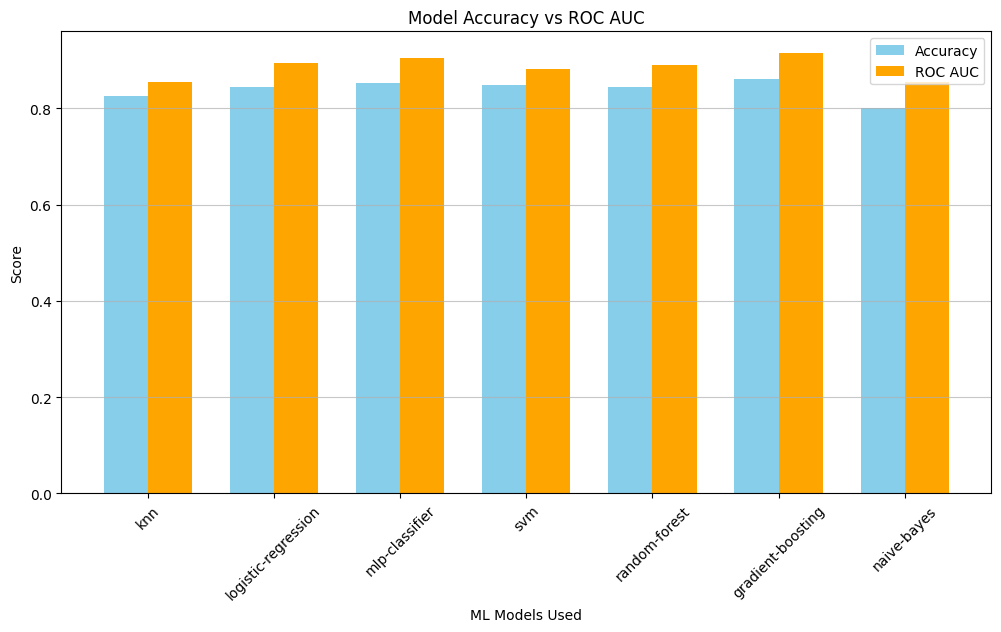

In [91]:
# Bar plot with both metrics
x = range(len(ml_models_used))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, accuracies, width=bar_width, label='Accuracy', color='skyblue')
plt.bar([i + bar_width for i in x], roc_aucs, width=bar_width, label='ROC AUC', color='orange')

# Add labels and ticks
plt.xlabel('ML Models Used')
plt.ylabel('Score')
plt.title('Model Accuracy vs ROC AUC')
plt.xticks([i + bar_width/2 for i in x], ml_models_used, rotation=45)
plt.legend()
plt.grid(True, axis='y', linestyle='-', alpha=0.7)

plt.show()

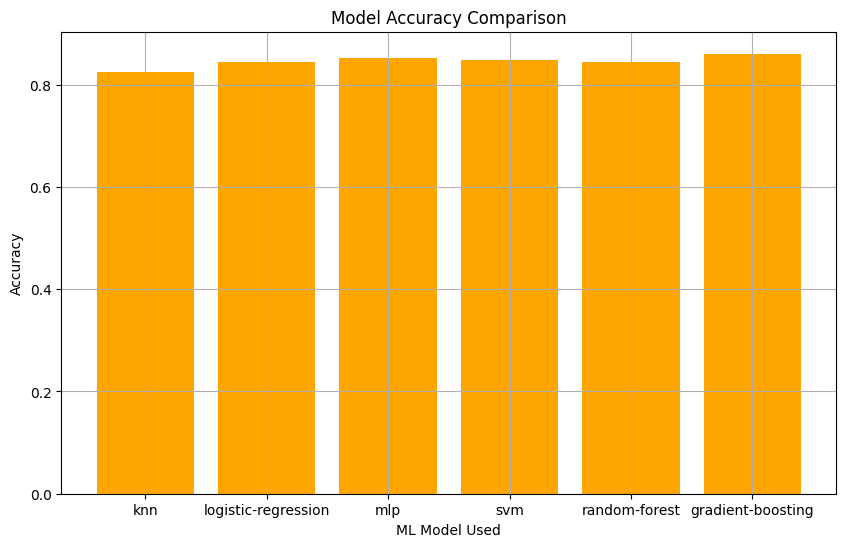

In [48]:
# Plotting the results dict for each of the models
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.bar(results.keys(), results.values(), color='orange')
plt.xlabel('ML Model Used')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

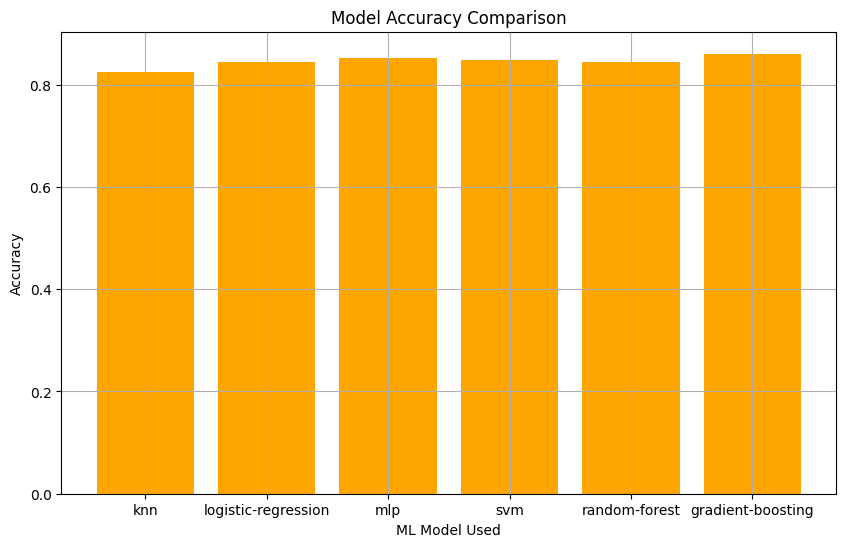

In [ ]:
# Plotting the results dict for each of the models => 2.0
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.bar(results.keys(), results.values(), color='orange')
plt.xlabel('ML Model Used')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

##### Ensemble Model with combination of GradientBoosting, MLP and Logistic Regression!

In [55]:
from sklearn.ensemble import VotingClassifier

In [56]:
ensemble = VotingClassifier(estimators=[
    ('gb', GradientBoostingClassifier()),
    ('mlp', MLPClassifier()),
    ('lr', LogisticRegression())
], voting='soft')

In [57]:
ensemble.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('gb', GradientBoostingClassifier()),
                             ('mlp', MLPClassifier()),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [58]:
ensemble_predict = ensemble.predict(x_test)

In [59]:
accuracy_score(y_test, ensemble_predict)

0.8561106523534269

#### Model Exporting

In [ ]:
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingClassifier())
])

In [ ]:
best_model.fit(x_train, y_train)

In [ ]:
joblib.dump(best_model, 'salary_model.pkl')